This project is done in google colab

# loading data to be stored to the database

In [5]:
import pandas as pd

db_data = pd.read_csv("/content/DOHMH_HIV_AIDS_Annual_Report.csv")
db_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6005 entries, 0 to 6004
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              6005 non-null   int64  
 1   Borough                           6005 non-null   object 
 2   UHF                               6005 non-null   object 
 3   Gender                            6005 non-null   object 
 4   Age                               6005 non-null   object 
 5   Race                              6005 non-null   object 
 6   HIV diagnoses                     6005 non-null   int64  
 7   HIV diagnosis rate                6005 non-null   float64
 8   Concurrent diagnoses              6005 non-null   int64  
 9   % linked to care within 3 months  6005 non-null   int64  
 10  AIDS diagnoses                    6005 non-null   int64  
 11  AIDS diagnosis rate               6005 non-null   float64
 12  PLWDHI

In [6]:
# check for null values
db_data.isnull().sum()

Year                                0
Borough                             0
UHF                                 0
Gender                              0
Age                                 0
Race                                0
HIV diagnoses                       0
HIV diagnosis rate                  0
Concurrent diagnoses                0
% linked to care within 3 months    0
AIDS diagnoses                      0
AIDS diagnosis rate                 0
PLWDHI prevalence                   0
% viral suppression                 0
Deaths                              0
Death rate                          0
HIV-related death rate              0
Non-HIV-related death rate          0
dtype: int64

In [7]:
# extract relevant variables
db_df = db_data.filter(['Age', 'Gender', 'Race', 'HIV diagnoses', 
                        'Concurrent diagnoses', '% viral suppression', 
                        'HIV-related death rate'])

# remove special character
db_df.columns = db_df.columns.str.replace('-', '_')
db_df.columns = db_df.columns.str.replace('%', 'percentage')
db_df.columns = db_df.columns.str.rstrip()
db_df.columns = db_df.columns.str.replace(' ', '_')
print(db_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6005 entries, 0 to 6004
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           6005 non-null   object 
 1   Gender                        6005 non-null   object 
 2   Race                          6005 non-null   object 
 3   HIV_diagnoses                 6005 non-null   int64  
 4   Concurrent_diagnoses          6005 non-null   int64  
 5   percentage_viral_suppression  6005 non-null   int64  
 6   HIV_related_death_rate        6005 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 328.5+ KB
None


Create database

In [9]:
# import package
import sqlite3

# create database
sql_con = sqlite3.connect('DOHMH_HIV_AIDS_Data_tb.db')
print("Database opened successfully");

# create table
sql_con.execute('''
CREATE TABLE IF NOT EXISTS DOHMH_HIV_AIDS_Data(Age text, Gender text, Race text, 
HIV_diagnoses text, Concurrent_diagnoses text, percentage_viral_suppression text, 
HIV_related_death_rate text);''')
sql_con.commit()
print("Table created successfully");
sql_con.close()

Database opened successfully
Table created successfully


In [10]:
sql_con = sqlite3.connect('DOHMH_HIV_AIDS_Data_tb.db')
# add data to the created database
db_df.to_sql('DOHMH_HIV_AIDS_Data', sql_con, if_exists='append', index = False)
print("Data saved to database")
sql_con.commit()
sql_con.close()
print("Database closed")

Data saved to database
Database closed


Access the database and querying data

In [11]:
sql_con = sqlite3.connect('DOHMH_HIV_AIDS_Data_tb.db')

dohmh_data = pd.read_sql('''SELECT * FROM DOHMH_HIV_AIDS_Data''', sql_con)
sql_con.commit()
sql_con.close()
print(dohmh_data)

          Age       Gender                    Race HIV_diagnoses  \
0         All          All                     All          3379   
1         All         Male                     All          2595   
2         All       Female                     All           733   
3         All  Transgender                     All            51   
4     13 - 19       Female                     All            47   
...       ...          ...                     ...           ...   
6000      All         Male  Asian/Pacific Islander             0   
6001      All         Male                   Black             1   
6002      All         Male         Latino/Hispanic             2   
6003      All         Male           Other/Unknown             1   
6004      All         Male                   White             0   

     Concurrent_diagnoses percentage_viral_suppression HIV_related_death_rate  
0                     640                           71                    5.8  
1                     4

# Load data for analysis and visualization

In [12]:
import pandas as pd

hiv_data = pd.read_csv("/content/DOHMH_HIV_AIDS_Annual_Report.csv")

# filter columns with the variables needed
hiv_df = hiv_data.filter(['Age', 'Gender', 'Race', 'HIV diagnoses', 
                        'Concurrent diagnoses', '% viral suppression', 
                        'HIV-related death rate'])

# remove special character
hiv_df.columns = hiv_df.columns.str.replace('-', '_')
hiv_df.columns = hiv_df.columns.str.replace('%', 'percentage')
hiv_df.columns = hiv_df.columns.str.rstrip()
hiv_df.columns = hiv_df.columns.str.replace(' ', '_')
print(hiv_df.head())

       Age       Gender Race  HIV_diagnoses  Concurrent_diagnoses  \
0      All          All  All           3379                   640   
1      All         Male  All           2595                   480   
2      All       Female  All            733                   153   
3      All  Transgender  All             51                     7   
4  13 - 19       Female  All             47                     4   

   percentage_viral_suppression  HIV_related_death_rate  
0                            71                     5.8  
1                            72                     5.7  
2                            68                     6.0  
3                            55                     5.7  
4                            57                     1.4  


# Data extraction and cleaning

In [13]:
# checking if the HIV data has null values
hiv_data.isnull().sum()

Year                                0
Borough                             0
UHF                                 0
Gender                              0
Age                                 0
Race                                0
HIV diagnoses                       0
HIV diagnosis rate                  0
Concurrent diagnoses                0
% linked to care within 3 months    0
AIDS diagnoses                      0
AIDS diagnosis rate                 0
PLWDHI prevalence                   0
% viral suppression                 0
Deaths                              0
Death rate                          0
HIV-related death rate              0
Non-HIV-related death rate          0
dtype: int64

check for duplicates

In [14]:
hiv_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6000     True
6001    False
6002    False
6003    False
6004    False
Length: 6005, dtype: bool

In [15]:
# drop duplicates

hiv_df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

,Age,Gender,Race,HIV_diagnoses,Concurrent_diagnoses,percentage_viral_suppression,HIV_related_death_rate
0,All,All,All,3379,640,71,5.8
1,All,Male,All,2595,480,72,5.7
2,All,Female,All,733,153,68,6.0
3,All,Transgender,All,51,7,55,5.7
4,13 - 19,Female,All,47,4,57,1.4
...,...,...,...,...,...,...,...
5999,All,Male,All,4,0,90,99999.0
6001,All,Male,Black,1,0,80,99999.0
6002,All,Male,Latino/Hispanic,2,0,87,99999.0
6003,All,Male,Other/Unknown,1,0,100,99999.0


# Statistical tests 

# Perfoming fisher's test

In [16]:
df_fisher = hiv_df.filter(['Gender', 'HIV_diagnoses', 'Concurrent_diagnoses'])
df_fisher

,Gender,HIV_diagnoses,Concurrent_diagnoses
0,All,3379,640
1,Male,2595,480
2,Female,733,153
3,Transgender,51,7
4,Female,47,4
...,...,...,...
6000,Male,0,0
6001,Male,1,0
6002,Male,2,0
6003,Male,1,0


In [17]:
# group gender and smoking
df_hd = df_fisher.groupby(["Gender"]).HIV_diagnoses.sum().reset_index()
# group gender and alcohol
df_cd = df_fisher.groupby(["Gender"]).Concurrent_diagnoses.sum().reset_index()
# join the two dataframe
df_fsh = pd.concat([df_hd, df_cd['Concurrent_diagnoses']], axis=1, join='inner')
display(df_fsh)

,Gender,HIV_diagnoses,Concurrent_diagnoses
0,All,39775,7649
1,Female,25844,5409
2,Male,93251,17514
3,Transgender,230,24


In [18]:
# dropping columns and rows not needed
df_fsh = df_fsh.iloc[1:3, 1:]
df_fsh

,HIV_diagnoses,Concurrent_diagnoses
1,25844,5409
2,93251,17514


In [19]:
# importing packages
import scipy.stats as stats

# doing fisher's test
odd_ratio, p_value = stats.fisher_exact(df_fsh)
print('the odd ratio is: ' + str(odd_ratio))
print('the p value is: ' + str(p_value))

the odd ratio is: 0.8973763062784533
the p value is: 2.915982281323395e-10


# Performing Statistical T-test

In [20]:
# filter data for t-test analysis
ttest_data = hiv_df.filter(['Gender', 'Race', 'HIV_diagnoses', 'Concurrent_diagnoses'])
ttest_data.head()

,Gender,Race,HIV_diagnoses,Concurrent_diagnoses
0,All,All,3379,640
1,Male,All,2595,480
2,Female,All,733,153
3,Transgender,All,51,7
4,Female,All,47,4


T-test on gender and HIV diagnoses

In [21]:
# install researchpy
!pip install researchpy

In [22]:
import researchpy as rp

# group data
male = ttest_data.query('Gender == "Male"')['HIV_diagnoses']
female = ttest_data.query('Gender == "Female"')['HIV_diagnoses']
ttest_data.groupby('Gender').describe()

# T-test for HIV diagnoses
rp.ttest(group1= ttest_data['HIV_diagnoses'][ttest_data['Gender'] == 'Male'], group1_name= "Male",
         group2= ttest_data['HIV_diagnoses'][ttest_data['Gender'] == 'Female'], group2_name= "Female")



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(   Variable       N       Mean          SD        SE  95% Conf.   Interval
 0      Male  2880.0  32.378819  129.139996  2.406382  27.660414  37.097225
 1    Female  2880.0   8.973611   35.773932  0.666608   7.666534  10.280688
 2  combined  5760.0  20.676215   95.466602  1.257883  18.210292  23.142139,
               Independent t-test    results
 0  Difference (Male - Female) =     23.4052
 1          Degrees of freedom =   5758.0000
 2                           t =      9.3733
 3       Two side test p value =      0.0000
 4      Difference < 0 p value =      1.0000
 5      Difference > 0 p value =      0.0000
 6                   Cohen's d =      0.2470
 7                   Hedge's g =      0.2470
 8               Glass's delta =      0.1812
 9                 Pearson's r =      0.1226)

In [23]:
# T-test for Concurrent diagnoses
rp.ttest(group1= ttest_data['Concurrent_diagnoses'][ttest_data['Gender'] == 'Male'], group1_name= "Male",
         group2= ttest_data['Concurrent_diagnoses'][ttest_data['Gender'] == 'Female'], group2_name= "Female")

(   Variable       N      Mean         SD        SE  95% Conf.  Interval
 0      Male  2880.0  6.081250  23.592722  0.439624   5.219240  6.943260
 1    Female  2880.0  1.878125   7.728598  0.144014   1.595744  2.160506
 2  combined  5760.0  3.979687  17.678736  0.232938   3.523042  4.436333,
               Independent t-test    results
 0  Difference (Male - Female) =      4.2031
 1          Degrees of freedom =   5758.0000
 2                           t =      9.0856
 3       Two side test p value =      0.0000
 4      Difference < 0 p value =      1.0000
 5      Difference > 0 p value =      0.0000
 6                   Cohen's d =      0.2394
 7                   Hedge's g =      0.2394
 8               Glass's delta =      0.1782
 9                 Pearson's r =      0.1189)

In [24]:
hiv_data.isnull().sum()

Year                                0
Borough                             0
UHF                                 0
Gender                              0
Age                                 0
Race                                0
HIV diagnoses                       0
HIV diagnosis rate                  0
Concurrent diagnoses                0
% linked to care within 3 months    0
AIDS diagnoses                      0
AIDS diagnosis rate                 0
PLWDHI prevalence                   0
% viral suppression                 0
Deaths                              0
Death rate                          0
HIV-related death rate              0
Non-HIV-related death rate          0
dtype: int64

# Normality test

In [25]:
# filter the variables to be used
from scipy.stats import normaltest

df_nom = hiv_data.filter(['Age', 'HIV diagnoses', 'HIV diagnosis rate', 
                          'Concurrent diagnoses', '% linked to care within 3 months', 
                          '% viral suppression', 'Deaths', 'HIV-related death rate'])


# remove special character
df_nom.columns = df_nom.columns.str.replace('-', '_')
df_nom.columns = df_nom.columns.str.replace('%', 'percentage')
df_nom.columns = df_nom.columns.str.rstrip()
df_nom.columns = df_nom.columns.str.replace(' ', '_')

# convert to numerical
df_nom = df_nom.astype('category')
wd_column = df_nom.select_dtypes(['category']).columns
df_nom[wd_column] = df_nom[wd_column].apply(lambda x: x.cat.codes)
print(df_nom.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6005 entries, 0 to 6004
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Age                                        6005 non-null   int8 
 1   HIV_diagnoses                              6005 non-null   int16
 2   HIV_diagnosis_rate                         6005 non-null   int16
 3   Concurrent_diagnoses                       6005 non-null   int16
 4   percentage_linked_to_care_within_3_months  6005 non-null   int8 
 5   percentage_viral_suppression               6005 non-null   int8 
 6   Deaths                                     6005 non-null   int16
 7   HIV_related_death_rate                     6005 non-null   int16
dtypes: int16(5), int8(3)
memory usage: 76.4 KB
None


In [26]:
# do the normality test
from scipy.stats import normaltest
# normality test
stat, p = normaltest(df_nom)
print('Statistics = %.3f, p = %.3f' % (stat.mean(), p.mean()))
# interpret results
alpha = 0.05
if p.all() > alpha:
    print('HIV related death rate data looks Gaussian (fail to reject H0)')
else:
    print('HIV related death rate data does not look Gaussian (reject H0)')

Statistics = 2684.892, p = 0.000
HIV related death rate data does not look Gaussian (reject H0)


# Data analysis and visualization

import the needed libraries

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1.	Logistic Regression model

filter out the required variables

In [28]:
data_logreg_model = hiv_data.filter(['Age', 'HIV diagnoses', 'HIV diagnosis rate', 
                          'Concurrent diagnoses', '% linked to care within 3 months', 
                          '% viral suppression', 'Deaths', 'HIV-related death rate'])

# remove special character
data_logreg_model.columns = data_logreg_model.columns.str.replace('-', '_')
data_logreg_model.columns = data_logreg_model.columns.str.replace('%', 'percentage')
data_logreg_model.columns = data_logreg_model.columns.str.rstrip()
data_logreg_model.columns = data_logreg_model.columns.str.replace(' ', '_')

print(data_logreg_model.head())
print(data_logreg_model.dtypes)

       Age  HIV_diagnoses  HIV_diagnosis_rate  Concurrent_diagnoses  \
0      All           3379                48.3                   640   
1      All           2595                79.1                   480   
2      All            733                21.1                   153   
3      All             51             99999.0                     7   
4  13 - 19             47                13.6                     4   

   percentage_linked_to_care_within_3_months  percentage_viral_suppression  \
0                                         66                            71   
1                                         66                            72   
2                                         66                            68   
3                                         63                            55   
4                                         64                            57   

   Deaths  HIV_related_death_rate  
0    2040                     5.8  
1    1423                     5.

In [29]:
# convert to numerical
data_logreg_model = data_logreg_model.astype('category')
wd_column = data_logreg_model.select_dtypes(['category']).columns
data_logreg_model[wd_column] = data_logreg_model[wd_column].apply(lambda x: x.cat.codes)
print(data_logreg_model.head())

   Age  HIV_diagnoses  HIV_diagnosis_rate  Concurrent_diagnoses  \
0    6            295                 473                   126   
1    6            291                 741                   122   
2    6            266                 205                   109   
3    6             51                1335                     7   
4    0             47                 130                     4   

   percentage_linked_to_care_within_3_months  percentage_viral_suppression  \
0                                         34                            47   
1                                         34                            48   
2                                         34                            44   
3                                         31                            31   
4                                         32                            33   

   Deaths  HIV_related_death_rate  
0     231                      57  
1     226                      56  
2     219           

In [30]:
# splitting the data to training and testing

y = data_logreg_model['HIV_related_death_rate']
x = data_logreg_model.drop(['HIV_related_death_rate'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=5)


In [31]:
# scalling the data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

Visualize the data for logistics regression

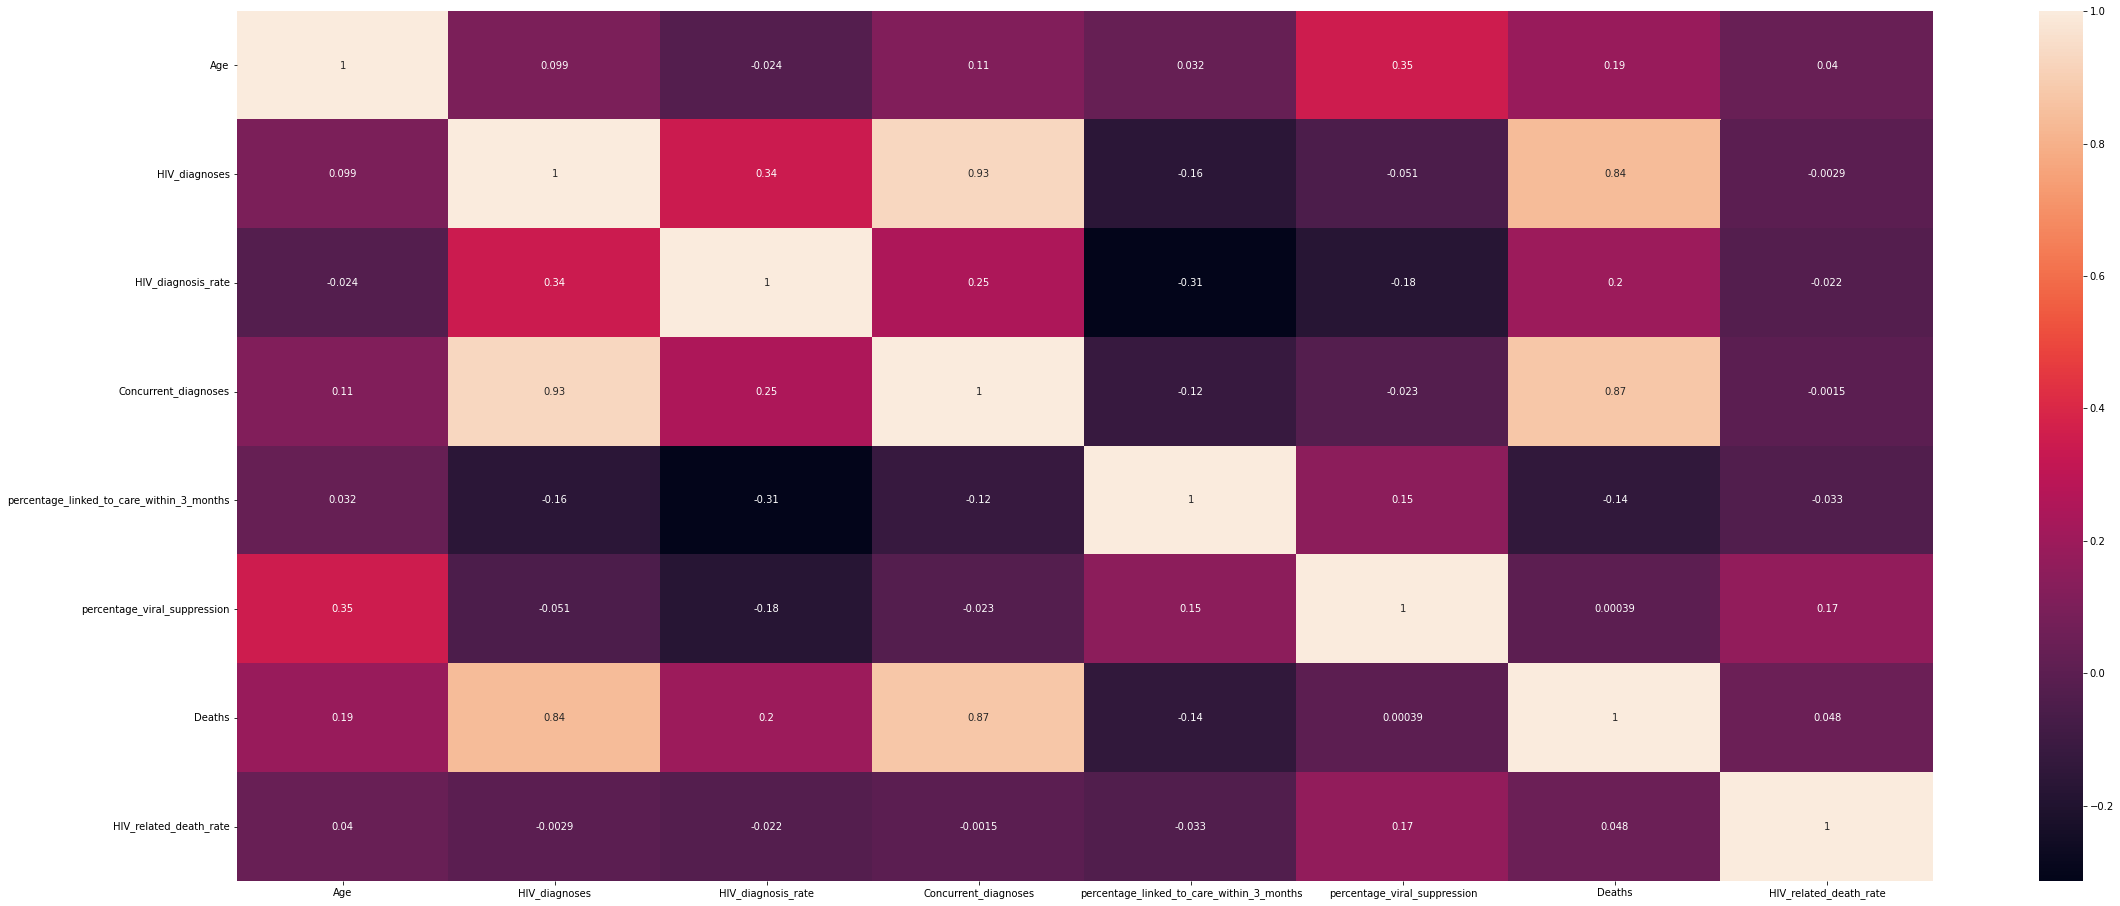

In [32]:
plt.figure(figsize = (38,16))
sns.heatmap(data_logreg_model.corr(), annot = True)
plt.savefig('heatmapgraph.png')
plt.show()

build and train the model

In [33]:
# building the model
model = LogisticRegression()
# train model
model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

evaluating the model

In [34]:
# evaluating the model
train_acc = model.score(X_train_scaled, y_train)
print("The Accuracy is {}".format(train_acc*100))

The Accuracy is 46.79433805162365


In [35]:
y_pred = model.predict(X_test)
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([  1,   1,   1, ...,   1, 224,   1], dtype=int16)

# 2.	Random Forest Classifier Model

prepared data with the needed variables

In [36]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
data_rfm = hiv_data.filter(['Age', 'HIV diagnoses', 'HIV diagnosis rate', 
                          'Concurrent diagnoses', '% linked to care within 3 months', 
                          '% viral suppression', 'Deaths', 'HIV-related death rate'])

# remove special character
data_rfm.columns = data_rfm.columns.str.replace('-', '_')
data_rfm.columns = data_rfm.columns.str.rstrip()
data_rfm.columns = data_rfm.columns.str.replace(' ', '_')

data_rfm.head()

,Age,HIV_diagnoses,HIV_diagnosis_rate,Concurrent_diagnoses,%_linked_to_care_within_3_months,%_viral_suppression,Deaths,HIV_related_death_rate
0,All,3379,48.3,640,66,71,2040,5.8
1,All,2595,79.1,480,66,72,1423,5.7
2,All,733,21.1,153,66,68,605,6.0
3,All,51,99999.0,7,63,55,12,5.7
4,13 - 19,47,13.6,4,64,57,1,1.4


In [37]:
# convert to numerical
data_rfm = data_rfm.astype('category')
wd_column = data_rfm.select_dtypes(['category']).columns
data_rfm[wd_column] = data_rfm[wd_column].apply(lambda x: x.cat.codes)
print(data_rfm.head())

# splitting to training and test
y = data_rfm['HIV_related_death_rate']
x = data_rfm.drop(['HIV_related_death_rate'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=5)


   Age  HIV_diagnoses  HIV_diagnosis_rate  Concurrent_diagnoses  \
0    6            295                 473                   126   
1    6            291                 741                   122   
2    6            266                 205                   109   
3    6             51                1335                     7   
4    0             47                 130                     4   

   %_linked_to_care_within_3_months  %_viral_suppression  Deaths  \
0                                34                   47     231   
1                                34                   48     226   
2                                34                   44     219   
3                                31                   31      12   
4                                32                   33       1   

   HIV_related_death_rate  
0                      57  
1                      56  
2                      59  
3                      56  
4                      13  


In [38]:

#Create a Gaussian Classifier
model = RandomForestClassifier(n_estimators=120)

#Train the model using the training sets y_pred=clf.predict(X_test)
model.fit(X_train,y_train)


RandomForestClassifier(n_estimators=120)

In [39]:
# predict the test data
y_pred = model.predict(X_test)
y_pred

array([  0,  37, 290, ...,   0,   0,  61], dtype=int16)

Random forest model evaluation

In [40]:
# model evaluation
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 95.33555370524563
Mean Squared Error: 3369.142381348876
Root Mean Squared Error: 58.04431394502717


In [41]:
# Accuracy of the Model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.43297252289758537


In [42]:
# display actual and predicted values
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
755,69,0
2628,43,37
3174,18,290
2742,95,0
1203,52,55
...,...,...
901,46,46
4596,96,0
1803,0,0
979,0,0


# 3. Support Vector Machine Model

filter out the required variables

In [43]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

data_svm = hiv_data.filter(['Age', 'HIV diagnoses', 'HIV diagnosis rate', 
                          'Concurrent diagnoses', '% linked to care within 3 months', 
                          '% viral suppression', 'Deaths', 'HIV-related death rate'])

# remove special character
data_svm.columns = data_svm.columns.str.replace('-', '_')
data_svm.columns = data_svm.columns.str.rstrip()
data_svm.columns = data_svm.columns.str.replace(' ', '_')

# convert to numerical
data_svm = data_svm.astype('category')
wd_column = data_svm.select_dtypes(['category']).columns
data_svm[wd_column] = data_svm[wd_column].apply(lambda x: x.cat.codes)
print(data_svm.head())
data_svm.head()

   Age  HIV_diagnoses  HIV_diagnosis_rate  Concurrent_diagnoses  \
0    6            295                 473                   126   
1    6            291                 741                   122   
2    6            266                 205                   109   
3    6             51                1335                     7   
4    0             47                 130                     4   

   %_linked_to_care_within_3_months  %_viral_suppression  Deaths  \
0                                34                   47     231   
1                                34                   48     226   
2                                34                   44     219   
3                                31                   31      12   
4                                32                   33       1   

   HIV_related_death_rate  
0                      57  
1                      56  
2                      59  
3                      56  
4                      13  


,Age,HIV_diagnoses,HIV_diagnosis_rate,Concurrent_diagnoses,%_linked_to_care_within_3_months,%_viral_suppression,Deaths,HIV_related_death_rate
0,6,295,473,126,34,47,231,57
1,6,291,741,122,34,48,226,56
2,6,266,205,109,34,44,219,59
3,6,51,1335,7,31,31,12,56
4,0,47,130,4,32,33,1,13


split the data to training and testing

In [44]:
y = data_svm['HIV_related_death_rate']
x = data_svm.drop(['HIV_related_death_rate'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [45]:
# train the model

model = SVC(kernel='rbf', random_state = 1)
model.fit(X_train,y_train)

SVC(random_state=1)

In [46]:
# carry out prediction
y_pred = model.predict(X_test)
y_pred

array([290,   0,   0, ...,   0,   0,   0], dtype=int16)

In [47]:
# display actual and predicted values
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
4324,26,290
1362,0,0
3783,30,0
472,0,0
1371,0,0
...,...,...
806,102,0
1430,51,0
1804,0,0
3761,33,0


In [48]:
cfm = confusion_matrix(y_test,y_pred)
accuracy = float(cfm.diagonal().sum())/len(y_test)
print("\nAccuracy Of SVM : ", accuracy)


Accuracy Of SVM :  0.4279766860949209


# visualize the data

In [49]:
# importing libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
# filter needed variables
data_vl = hiv_data.filter(['Age', 'Gender', 'HIV diagnoses', 'HIV diagnosis rate', 
                          'Concurrent diagnoses', '% linked to care within 3 months', 
                          '% viral suppression', 'Deaths', 'HIV-related death rate'])

# remove special character
data_vl.columns = data_vl.columns.str.replace('-', '_')
data_vl.columns = data_vl.columns.str.rstrip()
data_vl.columns = data_vl.columns.str.replace(' ', '_')
data_vl.head()

,Age,Gender,HIV_diagnoses,HIV_diagnosis_rate,Concurrent_diagnoses,%_linked_to_care_within_3_months,%_viral_suppression,Deaths,HIV_related_death_rate
0,All,All,3379,48.3,640,66,71,2040,5.8
1,All,Male,2595,79.1,480,66,72,1423,5.7
2,All,Female,733,21.1,153,66,68,605,6.0
3,All,Transgender,51,99999.0,7,63,55,12,5.7
4,13 - 19,Female,47,13.6,4,64,57,1,1.4


In [51]:
data_vl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6005 entries, 0 to 6004
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               6005 non-null   object 
 1   Gender                            6005 non-null   object 
 2   HIV_diagnoses                     6005 non-null   int64  
 3   HIV_diagnosis_rate                6005 non-null   float64
 4   Concurrent_diagnoses              6005 non-null   int64  
 5   %_linked_to_care_within_3_months  6005 non-null   int64  
 6   %_viral_suppression               6005 non-null   int64  
 7   Deaths                            6005 non-null   int64  
 8   HIV_related_death_rate            6005 non-null   float64
dtypes: float64(2), int64(5), object(2)
memory usage: 422.4+ KB


In [52]:
data_vl.head()

,Age,Gender,HIV_diagnoses,HIV_diagnosis_rate,Concurrent_diagnoses,%_linked_to_care_within_3_months,%_viral_suppression,Deaths,HIV_related_death_rate
0,All,All,3379,48.3,640,66,71,2040,5.8
1,All,Male,2595,79.1,480,66,72,1423,5.7
2,All,Female,733,21.1,153,66,68,605,6.0
3,All,Transgender,51,99999.0,7,63,55,12,5.7
4,13 - 19,Female,47,13.6,4,64,57,1,1.4


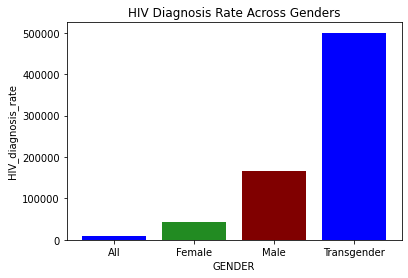

In [53]:
# visualizing HIV diagnosis rate
df_vl = data_vl.groupby('Gender')['HIV_diagnosis_rate'].sum().to_frame().reset_index()
#Creating the column plot 
plt.bar(df_vl['Gender'],df_vl['HIV_diagnosis_rate'],color = ['#0000FF','#228B22','#800000']) 
#Adding the aesthetics
plt.title('HIV Diagnosis Rate Across Genders')
plt.xlabel('GENDER')
plt.ylabel('HIV_diagnosis_rate') 
#Show the plot
plt.show()

In [54]:
df_vl

,Gender,HIV_diagnosis_rate
0,All,8360.2
1,Female,42571.9
2,Male,166679.4
3,Transgender,499995.0


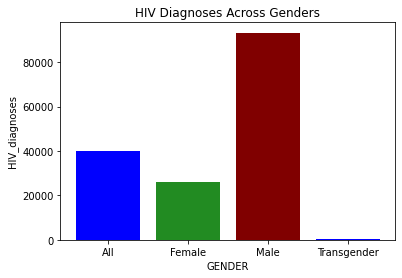

In [55]:
df_vl = data_vl.groupby('Gender')['HIV_diagnoses'].sum().to_frame().reset_index()
#Creating the column plot 
plt.bar(df_vl['Gender'],df_vl['HIV_diagnoses'],color = ['#0000FF','#228B22','#800000']) 
#Adding the aesthetics
plt.title('HIV Diagnoses Across Genders')
plt.xlabel('GENDER')
plt.ylabel('HIV_diagnoses') 
#Show the plot
plt.show()

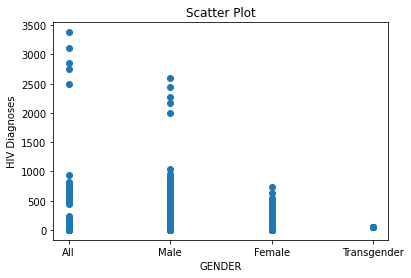

In [56]:
# Scatter plot with day against tip
plt.scatter(data_vl['Gender'], data_vl['HIV_diagnoses'])
# Adding Title to the Plot
plt.title("Scatter Plot")
# Setting the X and Y labels
plt.xlabel('GENDER')
plt.ylabel('HIV Diagnoses')
  
plt.show()